In [28]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

(275, 184, 3)
(256, 256, 3)


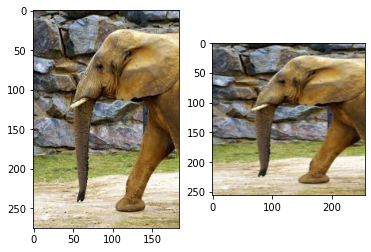

In [30]:
import cv2
image_1 = cv2.imread('/content/drive/MyDrive/Datasets/Asian vs African Elephants/train/African/af_tr10.jpg')
# original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])


print(image_1.shape)

# resizing the image 

image_resize = cv2.resize(image_1 , ((256,256)))

print(image_resize.shape)
plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [31]:
# setting same size of an image 

img_height, img_width = [256,256]


In [32]:
# finding the data:

path = '/content/drive/MyDrive/Datasets/Asian vs African Elephants'

In [66]:
# finding training data path and test data path 

train_data_path = '/content/drive/MyDrive/Datasets/Asian vs African Elephants/train/'
test_data_path = '/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/'

In [67]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [68]:
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [69]:
# Data_preprocessing on the image using tensorflow image data generator module 


# follow = https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


training_prepross = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       vertical_flip = True)

# training is done with rescale pixel so testing should be also same:

# irrepective of that nothinh should be added for test:

testing_process = ImageDataGenerator(rescale = 1./255)



In [70]:
# Finding the label folders:
# using glob we can find the number of label folders in trainin_dataset_folder:

import glob 
from glob import glob

glob('/content/drive/MyDrive/Datasets/Asian vs African Elephants/train/*')


['/content/drive/MyDrive/Datasets/Asian vs African Elephants/train/African',
 '/content/drive/MyDrive/Datasets/Asian vs African Elephants/train/Asian']

In [71]:
glob('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/*')

['/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/African',
 '/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/Asian']

In [79]:
target = ['Asian','African']

In [80]:
## collecting each image from training labels folder and test labels folder:

train_data = training_prepross.flow_from_directory(train_data_path , 
                                                   target_size = (img_height,img_width),
                                                   classes = target , 
                                                   class_mode = 'binary',
                                                   batch_size = 10)



test_data = testing_process.flow_from_directory(test_data_path , 
                                                   target_size = (img_height,img_width),
                                                   classes = target , 
                                                   class_mode = 'binary',
                                                   batch_size = 10)


Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [81]:
# Now its time for Building an CNN Model architecture:

# Importing required Packages:

from tensorflow.keras.models import Sequential # beginnnig  of CNN 
from tensorflow.keras.layers import Conv2D , MaxPool2D ,Flatten,Activation , Dense
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.optimizers import Adam


In [82]:
# Build CNN Architecture:

model = Sequential()

# First hidden layer in CNN
model.add(Conv2D(128 , kernel_size = (3,3),padding='same',activation='relu',input_shape = (img_height,img_width,3)))
model.add(MaxPool2D(pool_size = (2,2)))

# second hidden layer in CNN 
model.add(Conv2D(64 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Third hidden layer in CNN 
model.add(Conv2D(32 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fourth hidden layer in CNN 
model.add(Conv2D(16 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fifth hidden layer in CNN 
model.add(Conv2D(8 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Sixth hidden layer in CNN 
model.add(Conv2D(4 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())  # converting into 1-d and giving 1-d to ANN 

model.add(Dense(32 , activation = 'relu')) # first hidden layer in ANN
model.add(Dense(16 , activation = 'relu'))  # second hidden layer in ANN
model.add(Dense(8 , activation = 'relu'))  # Third Hidden layer in ANN 

model.add(Dense(1 , activation = 'sigmoid')) # since its is a binary classfication using sigmoid as an output actiavtion function:



In [83]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 32)      

In [84]:
model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])



In [86]:
model.fit(train_data , epochs = 20)

Epoch 1/20
84/84 [==============================] - 15s 179ms/step - loss: 0.6932 - Accuracy: 0.5000
Epoch 2/20
84/84 [==============================] - 15s 180ms/step - loss: 0.6932 - Accuracy: 0.5000
Epoch 3/20
84/84 [==============================] - 15s 179ms/step - loss: 0.6933 - Accuracy: 0.4857
Epoch 4/20
84/84 [==============================] - 15s 179ms/step - loss: 0.6932 - Accuracy: 0.4714
Epoch 5/20
84/84 [==============================] - 15s 176ms/step - loss: 0.6932 - Accuracy: 0.4810
Epoch 6/20
84/84 [==============================] - 15s 176ms/step - loss: 0.6932 - Accuracy: 0.4714
Epoch 7/20
84/84 [==============================] - 15s 182ms/step - loss: 0.6932 - Accuracy: 0.5000
Epoch 8/20
84/84 [==============================] - 15s 180ms/step - loss: 0.6932 - Accuracy: 0.5000
Epoch 9/20
84/84 [==============================] - 15s 179ms/step - loss: 0.6932 - Accuracy: 0.4619
Epoch 10/20
84/84 [==============================] - 15s 177ms/step - loss: 0.6933 - Accura

In [87]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [88]:
training_loss = model.history.history['loss']

In [89]:
training_loss

[0.6931747198104858,
 0.6931778192520142,
 0.6933099031448364,
 0.6932008266448975,
 0.6932073831558228,
 0.6932250261306763,
 0.6932134032249451,
 0.693220317363739,
 0.693178653717041,
 0.693250298500061,
 0.6932132244110107,
 0.6931962370872498,
 0.6932103037834167,
 0.6931709051132202,
 0.6931942701339722,
 0.6932539939880371,
 0.6932058930397034,
 0.6932068467140198,
 0.6931828856468201,
 0.6932070255279541]

In [90]:
training_acc = model.history.history['Accuracy']
training_acc

[0.5,
 0.5,
 0.48571428656578064,
 0.4714285731315613,
 0.4809523820877075,
 0.4714285731315613,
 0.5,
 0.5,
 0.46190476417541504,
 0.48571428656578064,
 0.4809523820877075,
 0.5,
 0.5,
 0.4928571283817291,
 0.5,
 0.4761904776096344,
 0.5,
 0.488095223903656,
 0.47380951046943665,
 0.49761903285980225]

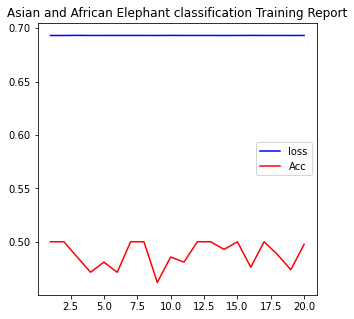

In [91]:
plt.figure(figsize = (5,5))
plt.title('Asian and African Elephant classification Training Report')
plt.plot(np.arange(1,21) , training_loss , color = 'b',label = 'loss')
plt.plot(np.arange(1,21) , training_acc , color = 'r',label = 'Acc')
plt.legend(loc = 0)
plt.show()

In [92]:
# Actual dependent values will be consider as 
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [93]:
y_test_pred = model.predict(test_data)

19/19 [==============================] - 58s 3s/step


In [94]:
y_test_pred

array([[0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.49893114],
       [0.498

In [95]:
# converting probability values into 0 and 1 class for checking performance report 
c = []
for i in y_test_pred:
  for j in i:
    if j > 0.5:
      c.append(1)
    else:
      c.append(0)
    

In [96]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [97]:
# Accuracy 

accuracy_score(test_data.classes , c)

0.48404255319148937

In [98]:
confusion_matrix(test_data.classes , c)

array([[91,  0],
       [97,  0]])

In [99]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        91
           1       0.00      0.00      0.00        97

    accuracy                           0.48       188
   macro avg       0.24      0.50      0.33       188
weighted avg       0.23      0.48      0.32       188



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[[180 179 187]
  [182 181 189]
  [180 180 188]
  ...
  [ 89 135 171]
  [ 89 134 173]
  [ 88 133 172]]

 [[179 176 187]
  [180 178 189]
  [176 176 186]
  ...
  [ 94 138 175]
  [ 92 136 175]
  [ 91 135 174]]

 [[175 174 188]
  [176 176 188]
  [176 176 188]
  ...
  [ 93 137 174]
  [ 92 136 173]
  [ 92 136 173]]

 ...

 [[ 57  73  10]
  [ 53  67  14]
  [ 41  59   1]
  ...
  [ 35  49  13]
  [ 36  54  14]
  [ 34  52  12]]

 [[ 53  68  13]
  [ 52  65  12]
  [ 46  59   5]
  ...
  [ 28  44   8]
  [ 31  47  10]
  [ 32  48  11]]

 [[ 54  64  12]
  [ 51  63  15]
  [ 46  55   8]
  ...
  [ 24  37   7]
  [ 22  38   9]
  [ 25  41  14]]]
(640, 960, 3)


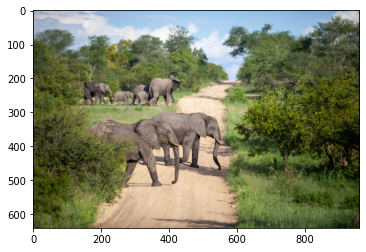

In [100]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/Asian/as_te15.jpg')
print(img)
print(img.shape)
plt.imshow(img)

In [101]:
import cv2

In [104]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (256,256))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  if result[0] > 0.5:
    print('The Prediction is = Asian')
  else:
    print('The Prediction is = African') 
  img = plt.imread(path)
  plt.imshow(img)

(680, 1024, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 34ms/step
[[0.49893114]]
The Prediction is = African


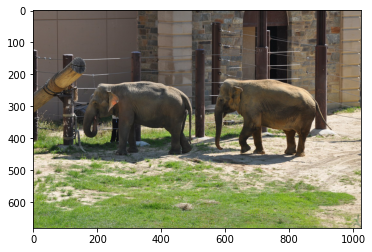

In [105]:
prediction('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/Asian/as_te28.jpg')

(259, 194, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 17ms/step
[[0.49893114]]
The Prediction is = African


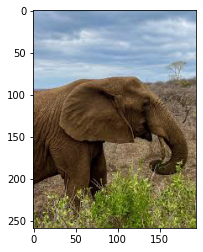

In [106]:
prediction('/content/drive/MyDrive/Datasets/Asian vs African Elephants/test/African/af_te12.jpg')